In [1]:
import requests
import numpy as np
import pandas as pd

import yfinance as yf
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [2]:
#  Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points
tesla_obj = yf.Ticker("TSLA")
tesla_data = tesla_obj.history(period="max")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [3]:
#  Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points
url = "https://stockanalysis.com/stocks/tsla/revenue/"
resp = requests.get(url)

beautiful_soup = BeautifulSoup(resp.text, "html5lib")
revenue_data = beautiful_soup.find("tbody", class_="svelte-1jtwn20")
revenue_arr = np.array(revenue_data.getText("__").split("__"))
tesla_revenue = pd.DataFrame(
    revenue_arr.reshape(-1, 5), columns=["date", "revenue", "change", "growth", "-"]
)
tesla_revenue.tail()

,date,revenue,change,growth,-
12,"Dec 31, 2011",204.24M,87.50M,74.95%,
13,"Dec 31, 2010",116.74M,4.80M,4.29%,
14,"Dec 31, 2009",111.94M,97.20M,659.35%,
15,"Dec 31, 2008",14.74M,14.67M,"20,094.52%",
16,"Dec 31, 2007",73.00K,-,-,


In [4]:
# Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points
gme_obj = yf.Ticker("GME")
gme_data = gme_obj.history(period="max")
gme_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [5]:
# Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points
url = "https://stockanalysis.com/stocks/gme/revenue/"
resp = requests.get(url)

beautiful_soup = BeautifulSoup(resp.text, "html5lib")
revenue_data = beautiful_soup.find("tbody", class_="svelte-1jtwn20")
revenue_arr = np.array(revenue_data.getText("__").split("__"))

gme_revenue = pd.DataFrame(
    revenue_arr.reshape(-1, 5), columns=["date", "revenue", "change", "growth", "-"]
)
gme_revenue.tail()

,date,revenue,change,growth,-
20,"Jan 31, 2003",1.35B,231.65M,20.66%,
21,"Jan 31, 2002",1.12B,364.44M,48.16%,
22,"Jan 31, 2001",756.70M,203.56M,36.80%,
23,"Jan 31, 2000",553.14M,169.78M,44.29%,
24,"Jan 31, 1998",383.36M,-,-,


In [7]:
# preproc

def preproc_revenue(revenue):
    # format dateindex
    revenue = revenue.set_index("date")
    revenue.index = pd.to_datetime(revenue.index, format="%b %d, %Y")

    # preproc delimeter
    def bmk2numeric(string):
        _dict = {
            "B": "1_000_000_000".replace("_", ""),
            "M": "1_000_000".replace("_", ""),
            "K": "1_000".replace("_", ""),
        }
        if string.endswith(tuple(_dict.keys())):
            _string = float(string[:-1]) * float(_dict[string[-1]])
        return _string

    revenue["revenue"] = revenue["revenue"].apply(bmk2numeric)

    return revenue

def preproc_ohlcv(ohlcv):
    ohlcv.index = ohlcv.index.tz_localize(None)
    return ohlcv

In [8]:
# draw
def make_graph(ohlcv, revenue, name):
    df = pd.concat([ohlcv["Close"], revenue["revenue"]], axis=1)
    df = df.bfill()
    df.columns = ["Price", "Revenue"]

    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1.plot(df.index, df["Price"], "g-")

    ax2 = ax1.twinx()
    ax2.plot(df.index, df["Revenue"], "b-")
    ax1.set_ylabel("Price", color="g")
    ax2.set_ylabel("Revenue", color="b")
    fig.suptitle(f"{name}")
    return None

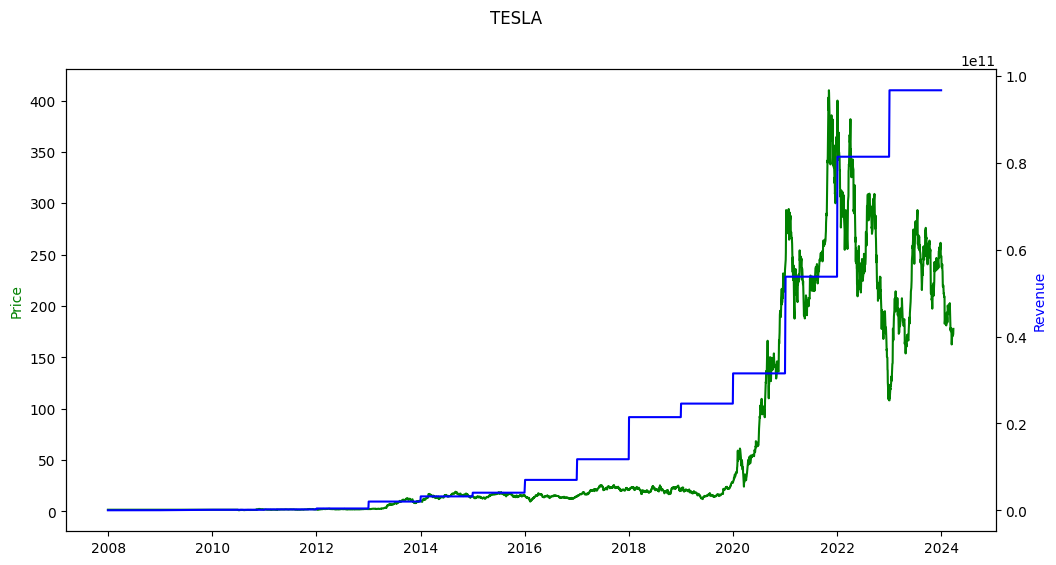

In [9]:
# Question 5 - Tesla Stock and Revenue Dashboard - 2 Points
_tesla_ohlcv = tesla_data.copy()
_tesla_revenue = tesla_revenue.copy()

_tesla_ohlcv = preproc_ohlcv(_tesla_ohlcv)
_tesla_revenue = preproc_revenue(_tesla_revenue)

make_graph(_tesla_ohlcv, _tesla_revenue,'TESLA')

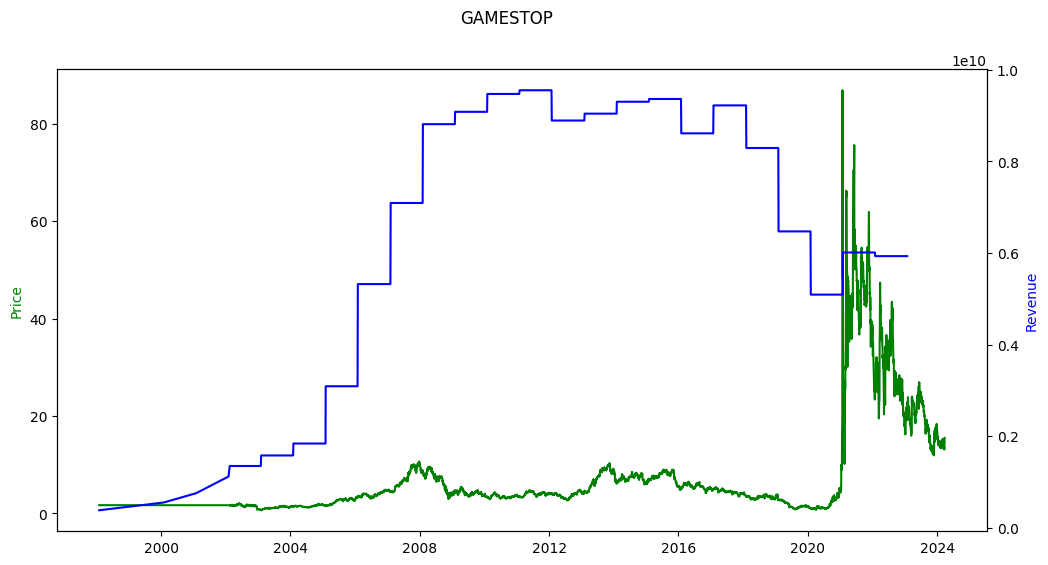

In [10]:
# Question 6 - GameStop Stock and Revenue Dashboard- 2 Points
_gme_ohlcv = gme_data.copy()
_gme_revenue = gme_revenue.copy()

_gme_ohlcv = preproc_ohlcv(_gme_ohlcv)
_gme_revenue = preproc_revenue(_gme_revenue)

make_graph(_gme_ohlcv, _gme_revenue, "GAMESTOP")

In [ ]:
# Question 7 - Sharing your Assignment Notebook - 2 Points